# Visualize

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve

base_dirs = ['./2nd_Battery/unet',
            './2nd_Battery/unet-mini',
            './2nd_Battery/unet-dice-loss',
            './2nd_Battery/unet-focal-loss',
            './2nd_Battery/unet-sgd',
            './2nd_Battery/unet-rmsprop',
            './2nd_Battery/unet-l1',
            './2nd_Battery/unet-l2',
            './2nd_Battery/unet-l1+l2']
colors = ['red', 'orange', 'yellow', 'pink', 'green', 'gold', 'magenta', 'cyan', 'violet']
losses = [0.2072, 0.1324, 0.3879, 0.0112, 0.1787, 0.1666, 0.0357, 0.0241, 0.0550]

In [2]:
lst_rst, lst_cdata = [], []
idx = 0

for base_dir in base_dirs:
    result_dir = os.path.join(base_dir, 'result')

    ##
    lst_data = os.listdir(os.path.join(result_dir, 'numpy'))

    lst_gt = [f for f in lst_data if f.startswith('gt')]
    lst_pr = [f for f in lst_data if f.startswith('pr')]

    lst_gt.sort()
    lst_pr.sort()

    ##
    # id = 0
    length = 1000
    tp_list, tn_list, fp_list, fn_list, rst_list = [], [], [], [], []

    for id in range(0, length):
        # img = np.load(os.path.join(result_dir,"numpy", lst_img[id]))
        gt = np.load(os.path.join(result_dir,"numpy", lst_gt[id]))
        pr = np.load(os.path.join(result_dir,"numpy", lst_pr[id]))

        tp = np.sum(np.logical_and(gt == 1, pr == 1))
        tn = np.sum(np.logical_and(gt == 0, pr == 0))
        fp = np.sum(np.logical_and(gt == 0, pr == 1))
        fn = np.sum(np.logical_and(gt == 1, pr == 0))

        precision = tp / (tp + fp)  # precision = TP / (TP + FP)
        recall = tp / (tp + fn) # recall = TP / (TP + FN), SE(Sensitivity), hit rate
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        f1 = 2 * precision * recall / (precision + recall)
        iou = tp / (tp + fn + fp) 

        tp_list.append(tp)
        tn_list.append(tn)
        fp_list.append(fp)
        fn_list.append(fn)


        # output_binary = (pr > 0).astype(np.int32)
        # label_flat = gt.flatten().astype(np.int32)
        # output_flat = output_binary.flatten().astype(np.int32)

        # accuracy = accuracy_score(label_flat, output_flat)
        # precision = precision_score(label_flat, output_flat)
        # recall = recall_score(label_flat, output_flat)
        # f1 = f1_score(label_flat, output_flat)

        rst_list.append((precision, recall, accuracy, f1, iou))
    
    # avg_precision = sum(item[0] for item in rst_list) / len(rst_list)
    # avg_recall = sum(item[1] for item in rst_list) / len(rst_list)
    # avg_accuracy = sum(item[2] for item in rst_list) / len(rst_list)
    # avg_f1 = sum(item[3] for item in rst_list) / len(rst_list)
    # avg_iou = sum(item[4] for item in rst_list) / len(rst_list)
    avg_precision = np.mean([item[0] for item in rst_list])
    avg_recall = np.mean([item[1] for item in rst_list])
    avg_accuracy = np.mean([item[2] for item in rst_list])
    avg_f1 = np.mean([item[3] for item in rst_list])
    avg_iou = np.mean([item[4] for item in rst_list])
    print(f'{os.path.basename(base_dir)} - precision: {avg_precision:.3f}, recall: {avg_recall:.3f}, accuracy: {avg_accuracy:.3f}, f1: {avg_f1:.3f}, iou: {avg_iou:.3f}')

    total_tp = np.sum(tp_list)
    total_tn = np.sum(tn_list)
    total_fp = np.sum(fp_list)
    total_fn = np.sum(fn_list)
    y_true = np.concatenate([np.ones(total_tp + total_fn), np.zeros(total_tn + total_fp)])
    y_score = np.concatenate([np.ones(total_tp), np.zeros(total_fn), np.ones(total_fp), np.zeros(total_tn)])

    lst_cdata.append((y_true, y_score))
    lst_rst.append((losses[idx], avg_precision, avg_recall, avg_accuracy, avg_f1, avg_iou))
    idx += 1

unet - precision: 0.582, recall: 0.895, accuracy: 0.958, f1: 0.685, iou: 0.550
unet-mini - precision: 0.708, recall: 0.929, accuracy: 0.973, f1: 0.794, iou: 0.676
unet-dice-loss - precision: 0.509, recall: 0.934, accuracy: 0.946, f1: 0.642, iou: 0.492
unet-focal-loss - precision: 0.894, recall: 0.762, accuracy: 0.984, f1: 0.818, iou: 0.711
unet-sgd - precision: 0.541, recall: 0.960, accuracy: 0.956, f1: 0.681, iou: 0.530
unet-rmsprop - precision: 0.855, recall: 0.789, accuracy: 0.984, f1: 0.794, iou: 0.696
unet-l1 - precision: 0.670, recall: 0.885, accuracy: 0.971, f1: 0.752, iou: 0.618
unet-l2 - precision: 0.778, recall: 0.788, accuracy: 0.977, f1: 0.777, iou: 0.649
unet-l1+l2 - precision: 0.714, recall: 0.908, accuracy: 0.976, f1: 0.790, iou: 0.667


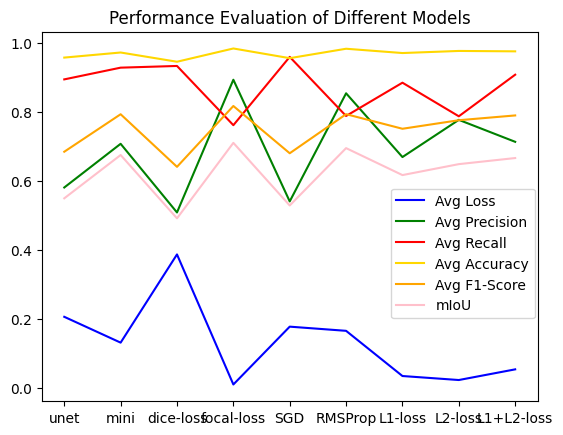

In [3]:
avg_loss_list = [item[0] for item in lst_rst]
avg_precision_list = [item[1] for item in lst_rst]
avg_recall_list = [item[2] for item in lst_rst]
avg_accuracy_list = [item[3] for item in lst_rst]
avg_f1_list = [item[4] for item in lst_rst]
avg_iou_list = [item[5] for item in lst_rst]
model_list = ['unet', 'mini', 'dice-loss', 'focal-loss', 'SGD', 'RMSProp', 'L1-loss', 'L2-loss', 'L1+L2-loss']

plt.plot(model_list, avg_loss_list, '-', color='blue', label=f'Avg Loss')
plt.plot(model_list, avg_precision_list, '-', color='green', label=f'Avg Precision')
plt.plot(model_list, avg_recall_list, '-', color='red', label=f'Avg Recall')
plt.plot(model_list, avg_accuracy_list, '-', color='gold', label=f'Avg Accuracy')
plt.plot(model_list, avg_f1_list, '-', color='orange', label=f'Avg F1-Score')
plt.plot(model_list, avg_iou_list, '-', color='pink', label=f'mIoU')
plt.title('Performance Evaluation of Different Models')
plt.legend(bbox_to_anchor=(0.69, 0.4))
plt.show()

unet PR AUC: 0.704, minDist: 0.497, (0.885424512257604, 0.51682025846915)
unet-mini PR AUC: 0.780, minDist: 0.375, (0.9224052152557138, 0.6334823172698756)
unet-dice-loss PR AUC: 0.692, minDist: 0.555, (0.931617865125619, 0.44876511258753)
unet-focal-loss PR AUC: 0.822, minDist: 0.277, (0.7487617009547043, 0.8840717896362793)
unet-sgd PR AUC: 0.731, minDist: 0.497, (0.9538732855195041, 0.5053105923119683)
unet-rmsprop PR AUC: 0.813, minDist: 0.283, (0.7531937969524044, 0.8625253033281114)
unet-l1 PR AUC: 0.754, minDist: 0.393, (0.8766366499467493, 0.626387811957221)
unet-l2 PR AUC: 0.760, minDist: 0.349, (0.7813983872652583, 0.7285129156027101)
unet-l1+l2 PR AUC: 0.789, minDist: 0.341, (0.9011364203573499, 0.6734219064478764)


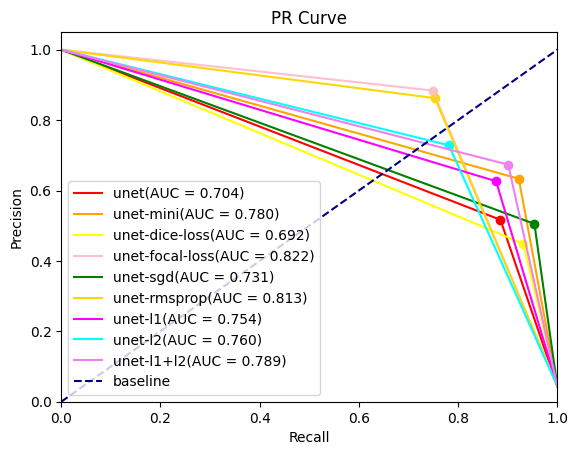

In [4]:
from sklearn.metrics import precision_recall_curve, auc

idx = 0
for cdata in lst_cdata:
    y_true, y_score = cdata

    # PR 커브 계산 및 그리기
    precision, recall, _ = precision_recall_curve(y_true, y_score)

    # AUC 계산
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, '-', color=colors[idx], label=f'{os.path.basename(base_dirs[idx])}(AUC = {pr_auc:.3f})')

    # (1, 1)에 가장 가까운 점 찾기
    min_distance = float('inf')
    closest_point = None
    for i in range(len(recall)):
        distance = ((1 - recall[i])**2 + (1 - precision[i])**2)**0.5
        if distance < min_distance:
            min_distance = distance
            closest_point = i
    plt.scatter(recall[closest_point], precision[closest_point], color=colors[idx], marker='o')

    print(f'{os.path.basename(base_dirs[idx])} PR AUC: {pr_auc:.3f}, minDist: {min_distance:.3f}, {(recall[closest_point], precision[closest_point])}')
    idx += 1

plt.plot([0.0, 1.05], [0.0, 1.05], '--', color='navy', label='baseline')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.legend()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

unet ROC AUC: 0.789, minDist: 0.121, (0.03855843283619862, 0.885424512257604)
unet-mini ROC AUC: 0.789, minDist: 0.081, (0.02485883834974988, 0.9224052152557138)
unet-dice-loss ROC AUC: 0.789, minDist: 0.087, (0.05330329573045489, 0.931617865125619)
unet-focal-loss ROC AUC: 0.789, minDist: 0.251, (0.004573449270014527, 0.7487617009547043)
unet-sgd ROC AUC: 0.789, minDist: 0.063, (0.0434974242368962, 0.9538732855195041)
unet-rmsprop ROC AUC: 0.789, minDist: 0.247, (0.0055918602005307965, 0.7531937969524044)
unet-l1 ROC AUC: 0.789, minDist: 0.126, (0.024355441418179306, 0.8766366499467493)
unet-l2 ROC AUC: 0.789, minDist: 0.219, (0.013563852969138058, 0.7813983872652583)
unet-l1+l2 ROC AUC: 0.789, minDist: 0.101, (0.020355838523738234, 0.9011364203573499)


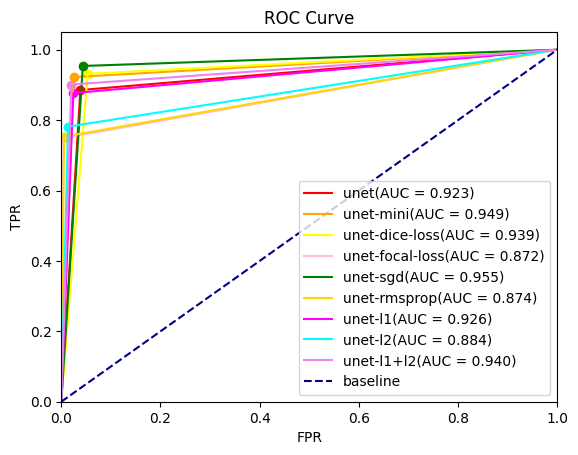

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score

idx = 0
for cdata in lst_cdata:
    y_true, y_score = cdata

    # AUC 계산
    auc = roc_auc_score(y_true, y_score)

    # ROC 커브 계산 및 그리기
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.plot(fpr, tpr, color=colors[idx], label=f'{os.path.basename(base_dirs[idx])}(AUC = {auc:.3f})')

    # (0, 1)에 가장 가까운 점 찾기
    min_distance = float('inf')
    closest_point = None
    for i in range(len(fpr)):
        distance = ((0 - fpr[i])**2 + (1 - tpr[i])**2)**0.5
        if distance < min_distance:
            min_distance = distance
            closest_point = i
    plt.scatter(fpr[closest_point], tpr[closest_point], color=colors[idx], marker='o')

    print(f'{os.path.basename(base_dirs[idx])} ROC AUC: {pr_auc:.3f}, minDist: {min_distance:.3f}, {(fpr[closest_point], tpr[closest_point])}')
    idx += 1

plt.plot([0.0, 1.05], [0.0, 1.05], '--', color='navy', label='baseline')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

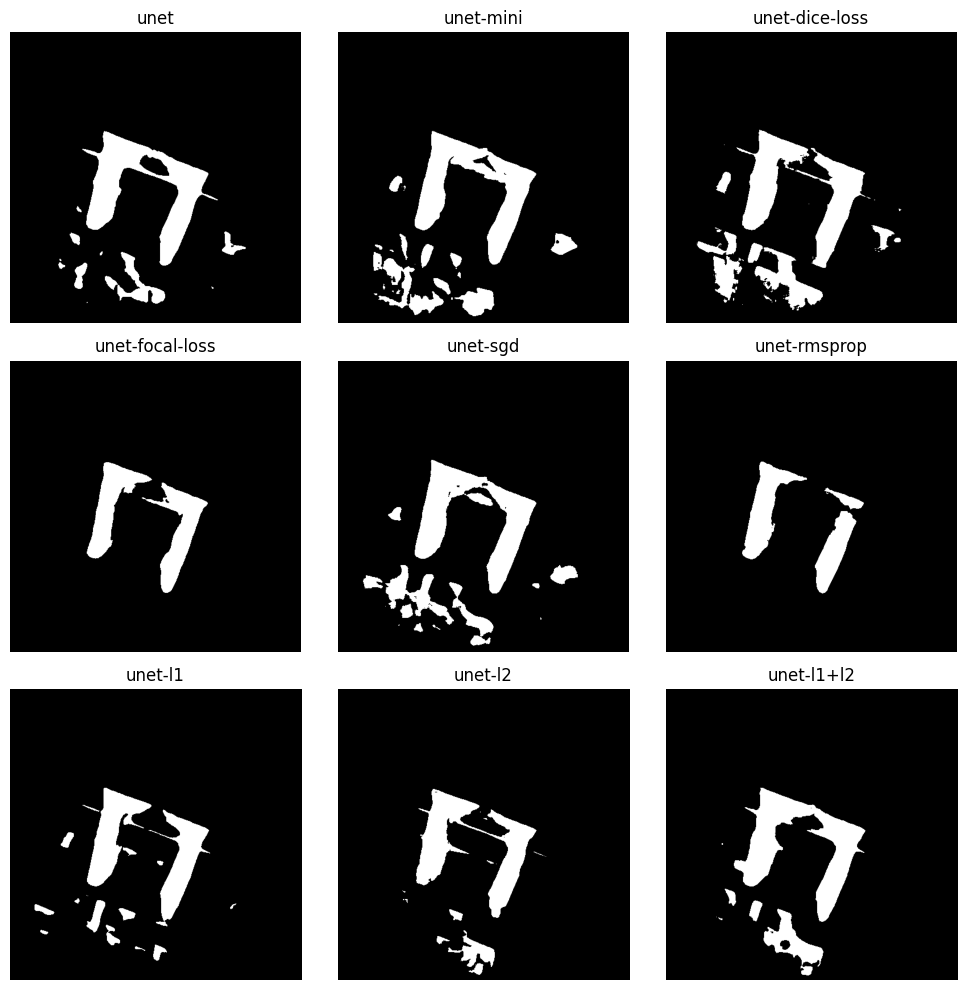

In [6]:
id = 7

fig, axs = plt.subplots(3, 3, figsize=(10, 10))
idx = 0
for base_dir in base_dirs:
    result_dir = os.path.join(base_dir, 'result')

    ##
    lst_data = os.listdir(os.path.join(result_dir, 'numpy'))

    lst_gt = [f for f in lst_data if f.startswith('gt')]
    lst_pr = [f for f in lst_data if f.startswith('pr')]

    lst_gt.sort()
    lst_pr.sort()

    ##
    # img = np.load(os.path.join(result_dir,"numpy", lst_img[id]))
    # gt = np.load(os.path.join(result_dir,"numpy", lst_gt[id]))
    pr = np.load(os.path.join(result_dir,"numpy", lst_pr[id]))

    axs[idx//3,idx%3].imshow(pr, cmap='gray')
    axs[idx//3,idx%3].axis('off')
    axs[idx//3,idx%3].set_title(f'{os.path.basename(base_dir)}')

    idx += 1

plt.tight_layout()
plt.show()